## 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:
#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

### 1. Importing your libraries and data

##### Installed Quandl using conda: 
##### conda install quandl

In [32]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [33]:
# Tell Python to remember a main folder path
path = r'/Users/gideon/Desktop/King County_USA_House sales'

In [34]:
path

'/Users/gideon/Desktop/King County_USA_House sales'

In [35]:
# Upload the dataset of Housesales_in_USA as df_housesales
df_housesales = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Housesales_in_USA.csv'))

In [36]:
df_housesales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [37]:
df_housesales.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [38]:
df_housesales.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [54]:
df_housesales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [55]:
# find missing data

df_housesales.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 2. Subsetting, wrangling, and cleaning time-series data

In [56]:
# make a new df with just the date and price
df_hs2 = df_housesales[['date', 'price']]

In [57]:
df_hs2

,date,price
0,20141013T000000,221900.0
1,20141209T000000,538000.0
2,20150225T000000,180000.0
3,20141209T000000,604000.0
4,20150218T000000,510000.0
...,...,...
21608,20140521T000000,360000.0
21609,20150223T000000,400000.0
21610,20140623T000000,402101.0
21611,20150116T000000,400000.0


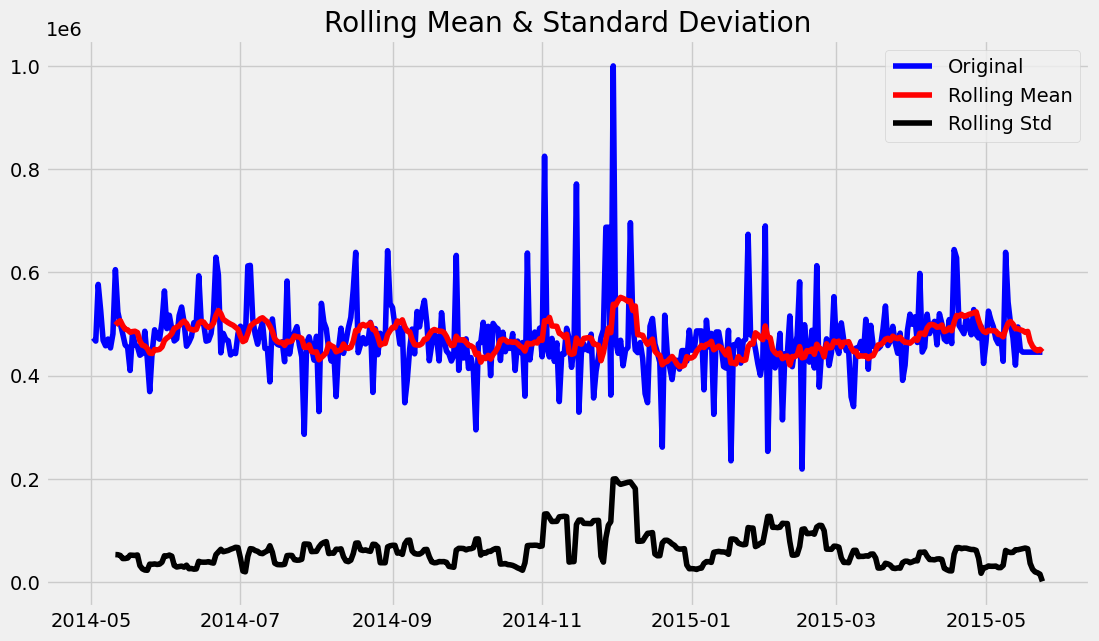

In [58]:
# convert our date field to a proper datetime
df_hs2['date'] = pd.to_datetime(df_hs2['date'])

# drop outliers (somewhat arbitrary)
df_hs2.drop(df_hs2.loc[(df_hs2['price'] > 1000000) | (df_hs2['price'] < 100000)].index, axis=0, inplace=True)

# set the date as our index
df_hs2.set_index('date', inplace=True)

# group our data by day
df_hsday = df_hs2.groupby(pd.Grouper(freq='D')).mean()

# backfill any empty days by getting previous day's mean
df_hsday.bfill(inplace=True)

# find the rolling mean and rolling standard deviation
roll_mean = df_hsday.rolling(window=10, center=False).mean()
roll_std = df_hsday.rolling(window=10, center=False).std()

# plot the figure with rolling mean and standard deviation
fig = plt.figure(figsize=(12,7))
plt.plot(df_hsday, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

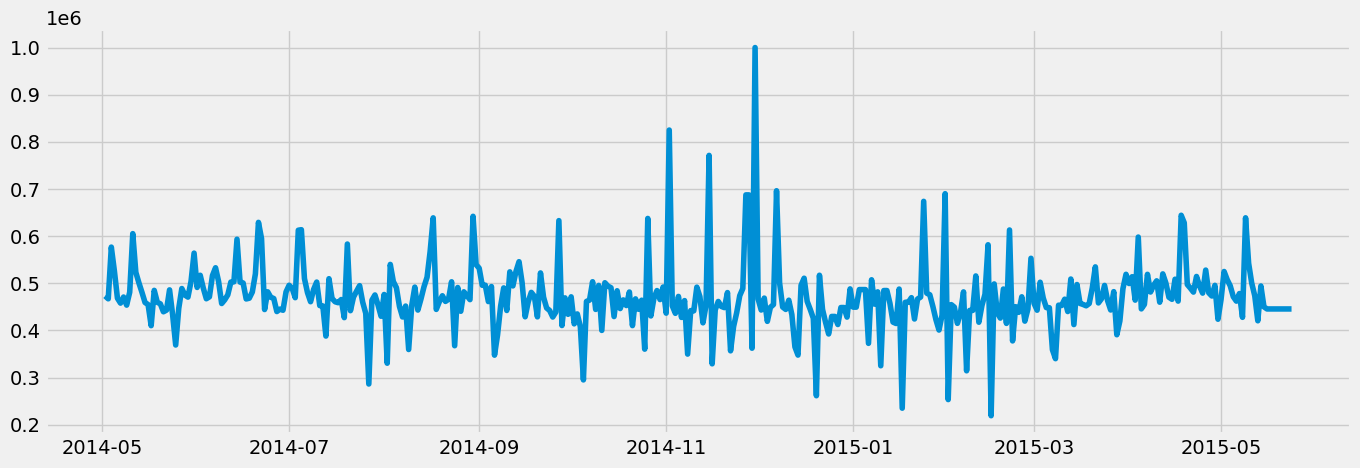

In [59]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_hsday)

### 3. Time-series analysis: decomposition

In [60]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_hsday, model='additive')

In [61]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

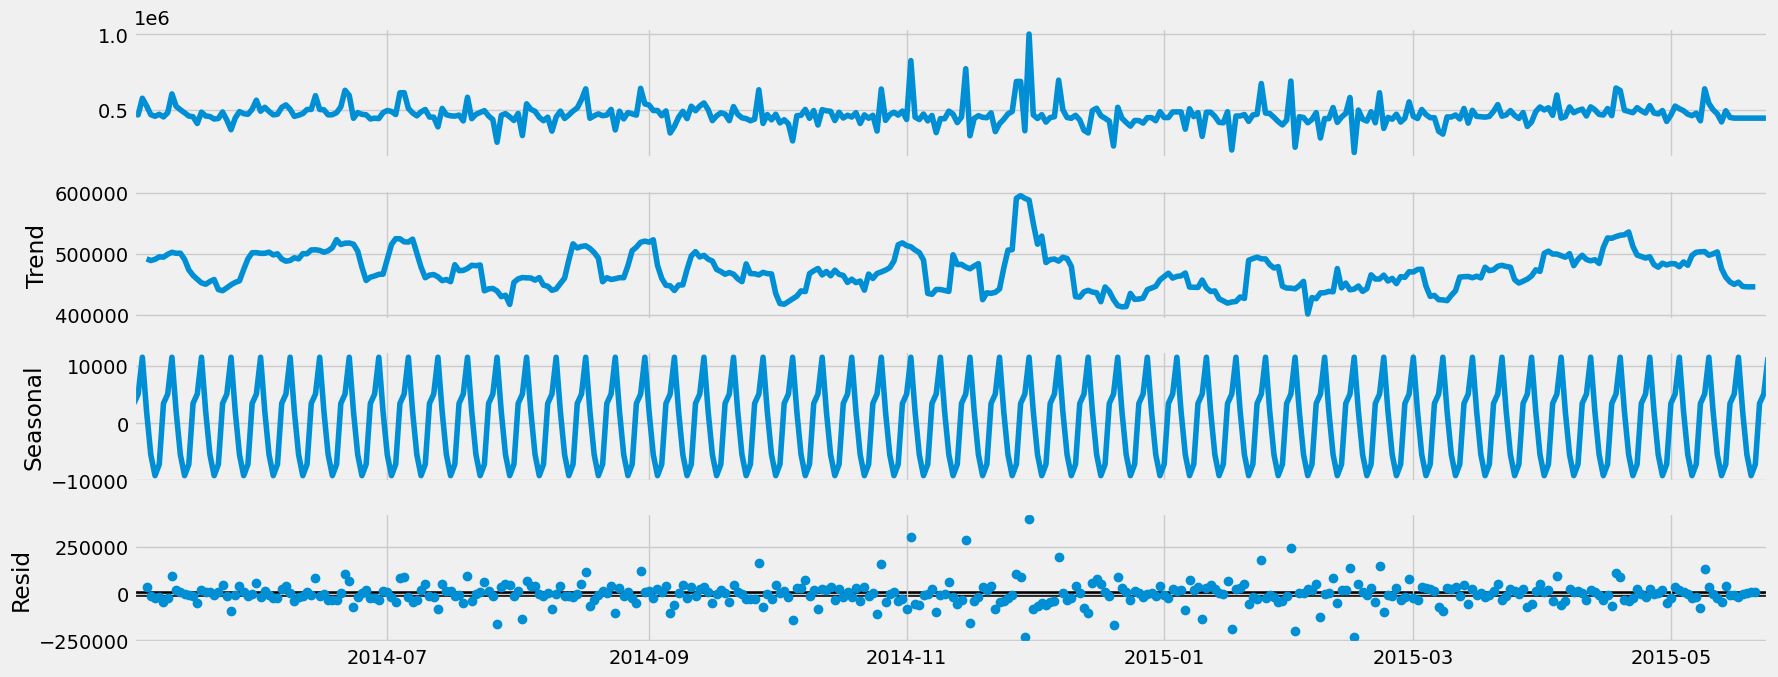

In [62]:
# Plot the separate components

decomposition.plot()
plt.show()

### 4. Testing for stationarity

#### We run a Dickey-Fuller hypothesis test on our time series to test for stationarity. The null hypothesis is that the data is not stationary. We will reject the null hypothesis if we have a p-value below .05.

In [65]:
dftest = adfuller(df_hsday)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -9.511959e+00
p-value                        3.231511e-16
#Lags Used                     2.000000e+00
Number of Observations Used    3.850000e+02
Critical Value (1%)           -3.447450e+00
Critical Value (5%)           -2.869077e+00
Critical Value (10%)          -2.570785e+00
dtype: float64


#### The p-value of 3.23e-16 on the Dickey-Fuller test is FAR under .05, so we reject the null hypothesis that the data has a trend. Our data set is not exhibiting time series trends, so we don't need to account for this.

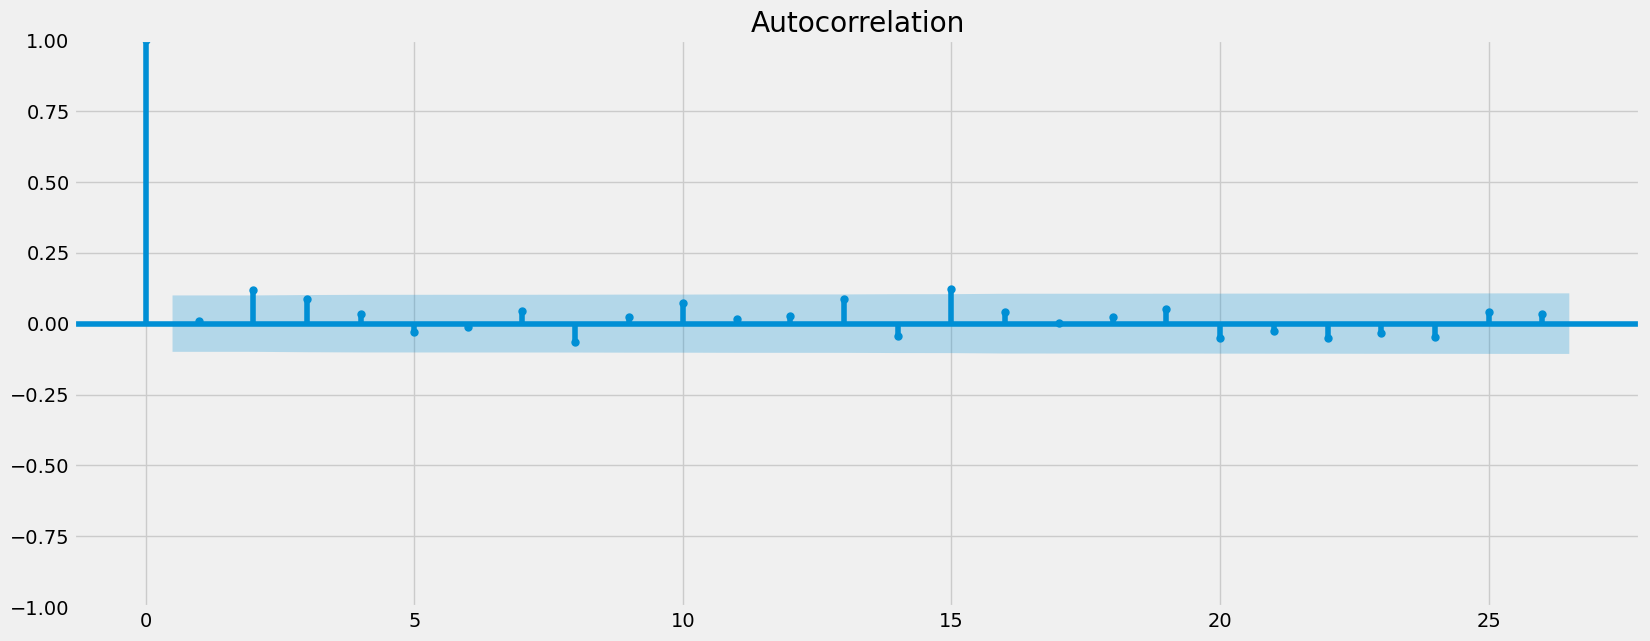

In [66]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_hsday)
plt.show()

### 5. Stationarizing the Federal Reserve Economic Data

In [67]:
data_diff = df_hsday - df_hsday.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [68]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [69]:
df_hsday.head()

,price
date,
2014-05-02,473044.531250
2014-05-03,466970.000000
2014-05-04,576690.000000
2014-05-05,526314.468354
2014-05-06,468262.842105


In [70]:
df_hsday.columns

Index(['price'], dtype='object')

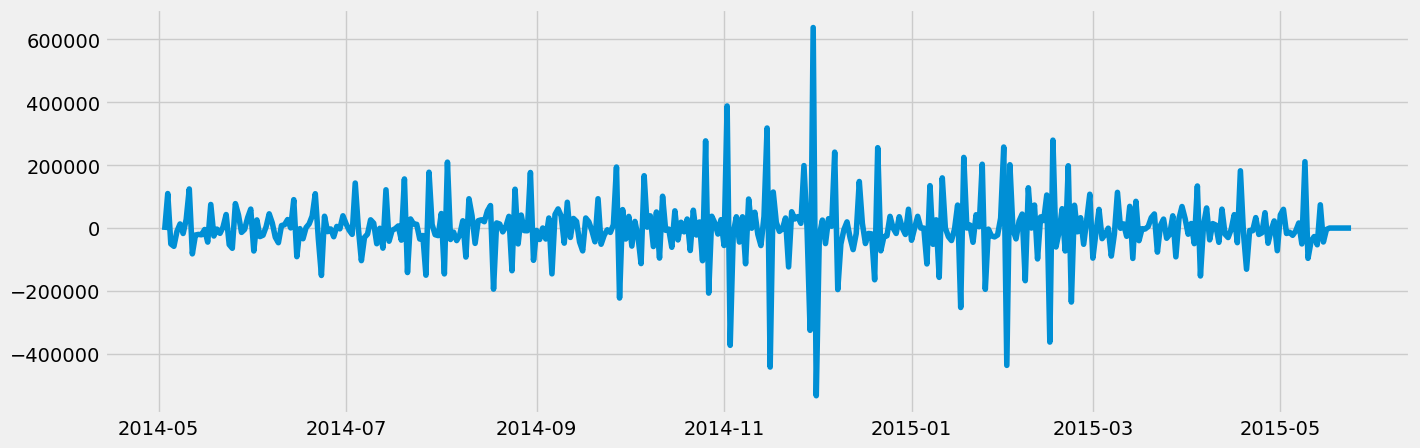

In [71]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [72]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -9.083730e+00
p-value                        3.991866e-15
Number of Lags Used            1.400000e+01
Number of Observations Used    3.720000e+02
Critical Value (1%)           -3.448052e+00
Critical Value (5%)           -2.869341e+00
Critical Value (10%)          -2.570926e+00
dtype: float64


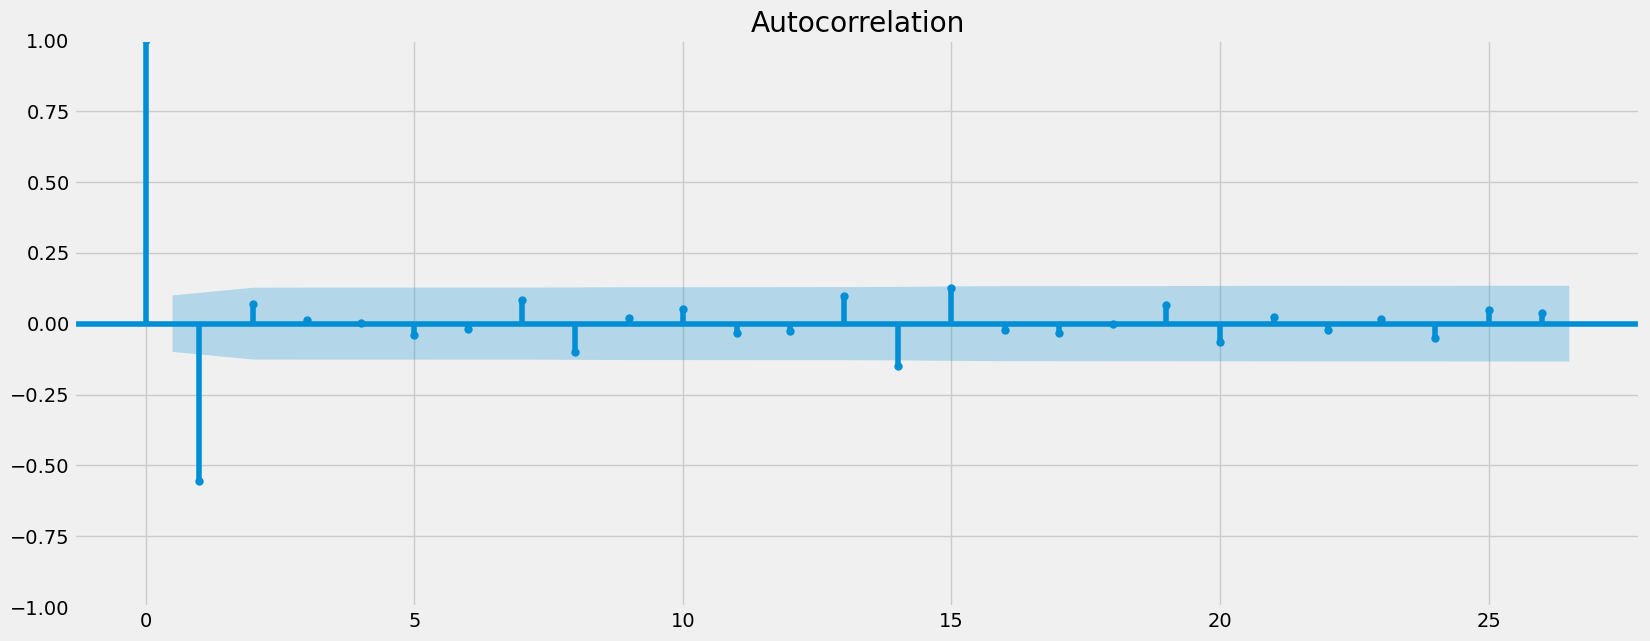

In [73]:
plot_acf(data_diff)
plt.show()

#### While the autocorrelation plot has improved slightly in terms of p-value, it’s still imperfect. This means that, despite the Dickey-Fuller test saying that your data is stationary and very weak.

# END